<a href="https://colab.research.google.com/github/cam123r/Workshop_2/blob/main/Workshop2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np


def generate_cities(number_cities: int) -> list:
    # HERE Generate random 3D Points using numpy generator
    cities = np.random.rand(number_cities, 3)
    return cities


def calculate_distance(point_1: np.array, point_2: np.array) -> float:
    point_1 = np.array(point_1)
    point_2 = np.array(point_2)

    # HERE return distance between two points using euclidean distance formula
    distance = np.linalg.norm(point_1 - point_2)
    return distance

In [3]:
def ant_colony_optimization(
    cities, n_ants, n_iterations, alpha, beta, evaporation_rate, Q
):
    number_cities = len(cities)
    pheromone = np.ones((number_cities, number_cities))

    # initialize output metrics
    best_path = None
    best_path_length = np.inf

    # per each iteration the ants will build a path
    for iteration in range(n_iterations):
        paths = []  # store the paths of each ant
        path_lengths = []

        for ant in range(n_ants):
            visited = [False] * number_cities

            # you could start from any city, but let's start from a random one
            current_city = np.random.randint(number_cities)
            visited[current_city] = True
            path = [current_city]
            path_length = 0

            while False in visited:  # while there are unvisited cities
                unvisited = np.where(np.logical_not(visited))[0]
                probabilities = np.zeros(len(unvisited))

                # based on pheromone, distance and alpha and beta parameters,
                # define the preference
                # for an ant to move to a city
                for i, unvisited_city in enumerate(unvisited):
                    # HERE add equation to calculate the probability of moving
                    # to a city based on pheromone, distance and alpha and beta parameters
                    pheromone_factor = pheromone[current_city, unvisited_city] ** alpha
                    distance_factor = 1 / calculate_distance(cities[current_city], cities[unvisited_city]) ** beta
                    probabilities[i] = pheromone_factor * distance_factor

                # normalize probabilities, it means, the sum of all probabilities is 1
                # HERE add normalization for calculated probabilities
                probabilities /= np.sum(probabilities)

                next_city = np.random.choice(unvisited, p=probabilities)
                path.append(next_city)
                # increase the cost of move through the path
                path_length += calculate_distance(
                    cities[current_city], cities[next_city]
                )
                visited[next_city] = True
                # move to the next city, for the next iteration
                current_city = next_city

            paths.append(path)
            path_lengths.append(path_length)

            # update with current best path, this is a minimization problem
            if path_length < best_path_length:
                best_path = path
                best_path_length = path_length

        # remove a bit of pheromone of all map, it's a way to avoid local minima
        pheromone *= evaporation_rate

        # current ant must add pheromone to the path it has walked
        for path, path_length in zip(paths, path_lengths):
            for i in range(number_cities - 1):
                pheromone[path[i], path[i + 1]] += Q / path_length
            pheromone[path[-1], path[0]] += Q / path_length
    return best_path, best_path_length

In [4]:
# model parameters
number_cities = 100
number_ants = 100
number_iterations = 100
alpha = 1
beta = 1
evaporation_rate = 0.5
Q = 1

# HERE create list of cities
cities = generate_cities(number_cities)

# HERE call ant_colony_optimization function
best_path, best_path_length = ant_colony_optimization(cities, number_ants, number_iterations, alpha, beta, evaporation_rate, Q)

Best path: [81, 50, 68, 70, 7, 1, 14, 35, 89, 2, 32, 83, 65, 37, 53, 3, 94, 52, 0, 64, 87, 74, 18, 12, 86, 25, 19, 98, 38, 6, 23, 51, 9, 13, 76, 67, 56, 40, 59, 47, 39, 4, 16, 49, 33, 29, 91, 62, 60, 82, 31, 27, 43, 71, 96, 41, 44, 28, 69, 8, 66, 79, 10, 78, 72, 90, 61, 30, 80, 93, 17, 85, 42, 20, 63, 99, 22, 46, 24, 54, 57, 92, 45, 75, 48, 26, 95, 97, 34, 5, 21, 11, 77, 73, 15, 36, 55, 84, 58, 88]
Best path length: 19.577932967992332


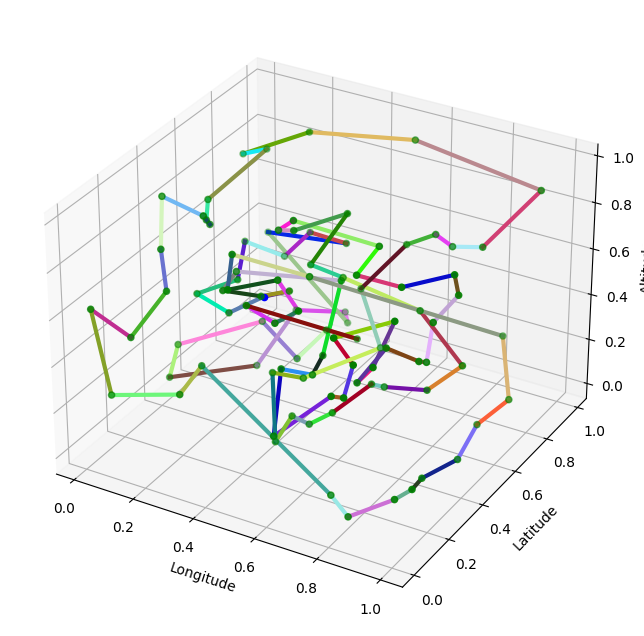

In [5]:
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def random_color() -> list:
    return [random.random(), random.random(), random.random()]


def plot_aco_route(cities: np.array, best_path: list):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection="3d")

    for i in range(len(best_path) - 1):
        ax.plot(
            [cities[best_path[i], 0], cities[best_path[i + 1], 0]],  # x axis
            [cities[best_path[i], 1], cities[best_path[i + 1], 1]],  # y axis
            [cities[best_path[i], 2], cities[best_path[i + 1], 2]],  # z axis
            c=random_color(),
            linestyle="-",
            linewidth=3,
        )

    ax.plot(
        [cities[best_path[0], 0], cities[best_path[-1], 0]],
        [cities[best_path[0], 1], cities[best_path[-1], 1]],
        [cities[best_path[0], 2], cities[best_path[-1], 2]],
        c=random_color(),
        linestyle="-",
        linewidth=3,
    )

    ax.scatter(cities[0, 0], cities[0, 1], cities[0, 2], c="b", marker="o")
    ax.scatter(cities[1:, 0], cities[1:, 1], cities[1:, 2], c="g", marker="o")

    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.set_zlabel("Altitude")
    plt.show()


print("Best path:", best_path)
print("Best path length:", best_path_length)
plot_aco_route(cities, best_path)